In [1]:
# Ian McLean 1877711
# PHYS 434 Lab 4
# 11/2/22

__Ising model__

square lattece of area $A=L×L$, where L is the lattice size

spin either +/- 1

1). Prepare an initial configuration of $A=L×L=10×10$ spins $S={si,j}$ by setting all spins to the same value (+1)

In [2]:
# importing necessary imports 
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import random
# defining ising spin NxN array, where N is 10
# one array to manipulate and one is the unaltered model
a = np.ones((10,10))
a_original = np.ones((10,10))
print(a)

[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]


As we can see from the output, this array can represent the model with 10 rows and 10 columns where currently, in the unaltered state without any flips, the spins are all considered up with spin 1.

2). Flip the spin of a randomly chosen lattice site, e.g. $(i0,j0)$. Then the configuration changes,$S:si0,j0→S′:−si0,j0$.

In [5]:
# generating random lattice site 
flip_site = (random.randrange(10),(random.randrange(10)))
# changing the spin at desired flip site
a[flip_site] = a[flip_site]*(-1)
# checking that the lattice of spins is properly updated
print("The randomly generated lattice site to have the spin flipped is: " + str(flip_site))
print(a)

The randomly generated lattice site to have the spin flipped is: (1, 3)
[[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1. -1.  1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]]


This shows what happens if a random lattice site is flipped. As we can see, a random location (row, column) is picked and then that site is flipped from up to down or down to up. In this case, The original matrix was all spin up, so one spin is flipped to spin down and the result is shown in the new (a) matrix above. 

In [4]:
# to conveniently set the continuous boundary conditions in place for indices along the edge of the matrix
def boundaries(i,j):
    # going past the bottom row
    if i+1>9:
        i_down =0
        i_up = 8
    # going above the top row
    elif i-1<0:
        i_down=1
        i_up=9
    # any other situation
    else:
        i_down=i+1
        i_up=i-1
    # going to column past right edge
    if j+1>9:
        j_right=0
        j_left = 8
    # going to column past left edge
    elif j-1<0:
        j_right=1
        j_left=9
    # any other case
    else:
        j_right=j+1
        j_left=j-1
    # return four values in the order (down, up, right, left)
    return i_down,i_up,j_right,j_left


This function deals with the continuous boundary condition we are considering where if we go one column to the right past 9, it would loop back to the furthest left column, and the same in the opposite direction. If we go above a row greater than index 9, then we loop back to row 0 and the same in the other direction. This function will return the correct indices for us to use, in the order (down, up, right, left) of the given indices.

In [5]:
# seeing the proper indices of the randomly selected flip site
print("the proper indices based on boundary condition of the randomly generated flip site are: " + str(boundaries(flip_site[0],flip_site[1])))

the proper indices based on boundary condition of the randomly generated flip site are: (8, 6, 5, 3)


3). Calculate the change in energy $\Delta E=H(S′)-H(S)$.

Recall: $H(S)=−\frac{J}{2}\sum_{i,j} s_{i,j}(s_{i+1,j} + s_{i-1,j} + s_{i,j+1} + s_{i,j-1})$

In [6]:
# function to calculate the hamiltonian for each local point, and then summing those and calculating hamiltonian of matrix
def HamiltonianFunc(array):
    # holding local hamiltonian for all points
    local_sums = []
    # looping through each row and then each column
    for row in range(0,len(array)):
        for column in range(0,len(array)):
            # returning the four boundary indices for each index in the matrix
            down,up,right,left = boundaries(row,column)
            # local hamiltonian sum for the current indices being checked
            local_sum = array[row,column]*(array[down,column] + array[up,column] +
                                           array[row,right] + array[row,left])
            # append to the list
            local_sums.append(local_sum)
    # sum all local hamiltonian values and then multiply by -.5 for proper equation
    Hamiltonian = -0.5 * np.sum(local_sums)
    # returns hamiltonian for given system
    return Hamiltonian

For given function above, we can calculate the hamiltonian of the system for a given size by calculating the local hamiltonian values for each index pair and then summing all of those and multiplying by a negative .5 to follow the equation outined above. 

In [7]:
# calculating the change in energy for the case of 1 flip
delta_E = HamiltonianFunc(a) - HamiltonianFunc(a_original)
print("The change in energy of the system for this singular flip is: " + str(delta_E))

The change in energy of the system for this singular flip is: 8.0


Thus, we can see that the change in energy for the singular frlip from up to down is a change of 8 for the energy of the system. This is just calculated as the hamiltonian of the changed system minus the hamiltonian of the original system unchanged.

4). If $\Delta E<0$, accept the move. Otherwise accept the move with probability $e^{-\Delta\frac{E}{T}}$, with $T=1.5$. This satisfies the detailed balance condition, ensuring a final equilibrium state.

In [8]:
# Delta E is not less than 0, thus we won't directly accept the move
# defining temperature
T = 1.5
# accepting move with defined probability
probability  = np.exp(-(delta_E)/T)
print("We accept this move with probability: " + str(round(probability,4)))

We accept this move with probability: 0.0048


So we know that if the change in energy is negative, we automatically accept the move, wherease if it isn't, we need to consider accepting the move with a given probability. This probability is calculated above based on the change in energy of the system. In the case of the single flip, the change in energy was positive and the corresponding probability we accept with is .0048 as calculated with the equation. 

5). Repeat 2-4 for N steps.

In [9]:
# defining function to make the flip and a copy for updating if N steps are taken
def generated_flip(lattice):
    # making copy of current matrix
    updated_lattice = lattice.copy()
    # generating the random flip site
    flip_site = (random.randrange(10),(random.randrange(10)))
    # applying the flip to the matrix
    updated_lattice[flip_site[0],flip_site[1]] = updated_lattice[flip_site[0],flip_site[1]]*-1
    # return the updated matrix
    return updated_lattice

This section is simply a function of what was previously done in the one flip scenario. It simply makes a copy of the matrix and generates it with the flip. This is an effort to minimize the computation time taken on this section.

In [10]:
# making necessary import to compare whether move is accepted or not
from scipy.stats import uniform
# defining initial matrix
initial = np.ones((10,10))
# list to hold all generated energies
energies = []
# for arbitrarily chosen N, which can be changed
for N in range(1,10000):    
    # updating matrix
    new = generated_flip(initial)
    #calculating previous and new hamiltonians of system
    H_initial=HamiltonianFunc(initial)
    H_new=HamiltonianFunc(new)
    #change in energy of system
    delta_E = H_new - H_initial
    #randomly generated value to compare for accept or reject probability 
    rand_prob=uniform.rvs()
    # ERROR. Professor Hsu said that delta energy can ONLY be 8, -8, 0r 0. 
    # I have a calculation error where +- 4 occurs where a 0 should.
    if delta_E == 4 or delta_E == -4:
        delta_E = int(0)
    # append to list of energies
    energies.append(delta_E)
    # condition on if we reject or accept the move with probability vs generated value from uniform distribution
    if delta_E < 0 or np.exp(-1*delta_E/T) > rand_prob:
        initial=new.copy()

This section will generalize the previous sections to N flips. It stores all of those energies in an array called 'energies' and these values will either be 8, -8, or 0 based on the change in energy of the system. This is simply calculated by the change in hamiltonians of the system and then the matrix is either updated or not based on if we accept it with a probability less than a randomly generated value between 0 and 1 in the uniform distribution. 

__Task a:__
Calculate the magnitization $<M>=\frac{1}{N}\sum_{i,j\in \Lambda} s_{i,j}$ as function of MC steps N, where Λ is the set of N spin configurations, i.e. {S0,S1,...,SN−1}. Plot <M> as function of N where N starts from 0 to 10000 with step size ΔN=100. Does the magnitization converge to an equillibrium value?

Text(0.5, 1.0, 'Magnetization per Step Size, with Increasing Number of Flips')

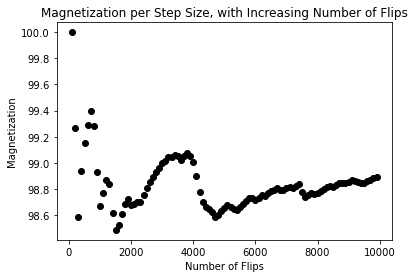

In [34]:
# making necessary import to compare whether move is accepted or not
from scipy.stats import uniform
# defining initial matrix
initial = np.ones((10,10))
# arrays to hold n values in steps of 100 and the magnetization for each
n_vals=[]
ind_magnet=[]
# initializing sum counter for sum of all indices in each matrix for each flip
Running_sum=0
# looping through maximum number of flips ocurring
for N in range(1,10000):  
    # updating the spin after applying flip to it
    new_spin = generated_flip(initial)
    # calculating old and new hamiltonians of the systems
    H_int=HamiltonianFunc(initial)
    H_new=HamiltonianFunc(new_spin)
    # calculating change of energy of the system
    delta_E = H_new - H_int
    # randomly generated value betwen 0 and 1 to determine accept or reject
    prob=uniform.rvs()
    # if delta energy immediately negative, or determine it we accept when randomly generated uniform value less than given equation 
    if delta_E < 0 or np.exp(-1*delta_E/T) > prob:
        # sum of all rows and columns
        spin_sum = np.sum(new_spin)
        # add to counter of sum
        Running_sum += (spin_sum)
        # update accordingly if this case works
        initial=new_spin.copy()
    # if not the case above
    else:
        # no updating of matrix, but still add to sum 
        spin_sum = np.sum(initial)
        Running_sum += (spin_sum)
    # mod math reduced the computation speed and flop count by changing a for loop to an if statement
    if N%100==0:
        # appending values to corresponding arrays if it is desired step size
        ind_magnet.append(Running_sum/N)
        n_vals.append(N)
# plotting the magnetization values for each number of flips as a scatter plot
plt.scatter(n_vals,np.array(ind_magnet), color = 'black')
# Adding all labels, details, and legend onto the plot
plt.xlabel('Number of Flips')
plt.ylabel('Magnetization')
plt.title('Magnetization per Step Size, with Increasing Number of Flips')

Essentially what is happening here, is we see that the magnetization will start to converge to a certain value, usually between 98-99.5 as I have seen from several trials. Also, great increases in N have little effect on the resulting magnetization once N is large enough, proving the fact that there is convergence. We should also note there is some flipping which occurs if some indices switch back to spin up from spin down, however in the long run, we generally see a consistent magnetization value.

__Task b__: Scan temperate T from 1.5 to 3.25 with 10 steps. For each temperate step, <M> is calculated with 10000 MC sampling. Plot <M> as function of T. Did you observe any phase transition? If you don't see the transition, try a larger temperature range to search for the critical temperateure Tc.

Text(0.5, 1.0, 'Magnetization per Temperature, with Increasing Temp Steps')

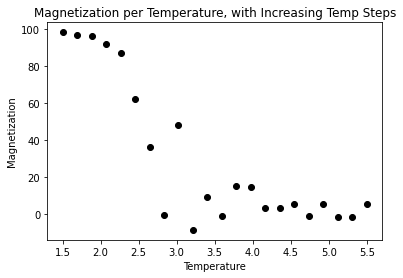

In [36]:
# defining the temperature values to scan
Ts = np.linspace(1.5,5.5,22)
# arrays to hold n values of magnetization for each
ind_magnet=[]
# N is set to 10000 as mentioned in question
# calculating for each T in the array:
for temp in Ts:
    # defining initial matrix
    initial = np.ones((10,10))
    # initializing sum counter for sum of all indices in each matrix for each flip
    Running_sum=0
    # looping through maximum number of flips ocurring
    for N in range(1,10000):  
        # updating the spin after applying flip to it
        new_spin = generated_flip(initial)
        # calculating old and new hamiltonians of the systems
        H_int=HamiltonianFunc(initial)
        H_new=HamiltonianFunc(new_spin)
        # calculating change of energy of the system
        delta_E = H_new - H_int
        # randomly generated value betwen 0 and 1 to determine accept or reject
        prob=uniform.rvs()
        # if delta energy immediately negative, or determine it we accept when randomly generated uniform value less than given equation 
        if delta_E < 0 or np.exp(-1*delta_E/temp) > prob:
            # sum of all rows and columns
            spin_sum = np.sum(new_spin)
            # add to counter of sum
            Running_sum += (spin_sum)
            # update accordingly if this case works
            initial=new_spin.copy()
        # if not the case above
        else:
            # no updating of matrix, but still add to sum 
            spin_sum = np.sum(initial)
            Running_sum += (spin_sum)
    ind_magnet.append(Running_sum/N)
# plotting the magnetization values for each number of flips as a scatter plot
plt.scatter(Ts,np.array(ind_magnet), color = 'black')
# Adding all labels, details, and legend onto the plot
plt.xlabel('Temperature')
plt.ylabel('Magnetization')
plt.title('Magnetization per Temperature, with Increasing Temp Steps')

Essentially what happens here, is we hold N constant this time at 10000, while we put this inside of a for loop for different values of temp. In this case, I made my scan range larger so that I could better see the phase transition that is clearly present. Around 2.5, the magnetization starts to flip, from a value around 100, to a value converging to 0 once the temperature reaches around 3. This is indicative of a clear phase transition at this critical temperature around 2.5 temperature.

__Two Body Decay of a massive particle__

$m_0=126.5$ GeV and a width of $\Gamma \approx 4$ MeV

1). Generate two angles of the first photon $(\theta1,\phi1)$ from a uniform spherical distribution.

In [5]:
# initializing problem variables
m = 126.5
Gamma = 4
# generating theta and phi
theta1 = np.random.uniform(0, 360)
phi1 = np.random.uniform(0, 180)
print("The generated coordinate pair of theta and phi is: " + str((theta1, phi1)))

The generated coordinate pair of theta and phi is: (148.31719876807313, 24.194957081067884)


In order to generate the two angles from a spherical distribution, we can just generate a random theta value between 0 and 360 and a random phi value between 0 and 180. This is printed above.

2). Assign the angles of the second photon (θ2,ϕ2) using the momentum conservation.

$$E^{2}=(pc)^{2}+(mc^{2})^{2}$$
Photon mass = 0
$$E^{2}=(pc)^{2}$$
$$E=(pc)$$
$$|p| = \frac{E}{2}$$ and are equal and opposite for both photons. Thus we can just take 180 degrees between each of these coordinates to uphold this requirement.

In [6]:
if theta1 > 180:
    theta2 = theta1 - 180
else:
    theta2 = theta1 + 180
if phi1 > 180:
    phi2 = phi1 - 180
else:
    phi2 = phi1 + 180
print("The angles of the second photon are: " + str((theta2, phi2)))

The angles of the second photon are: (328.3171987680731, 204.19495708106788)


This is just calculated by finding 180 degrees between the coordinates already generated as the momentum must be exactly opposite that of the coordinates already generated. Thus, based on what was generated, we add or subtract 180 from each coordinate in the convention of having all positive angles.

3). Generate Higgs mass from Breit-Wigner distribtion and assign energy to each photon(Using Simple Rejection Sampling or Importrance Sampling).

In [7]:
# Defining Breit-Wigner PDF
import math
def pdf(x, m, gamma):
    return (gamma/2)/((x-m)**2+(gamma/2)**2)/math.pi

In [32]:
# generating random variable for higgs
higgs = np.random.uniform(m-5*Gamma, m+5*Gamma,1000000)
# generating random variable for y
yi = np.random.uniform(0,1,1000000)
# initializing counter and list to hold non-rejected values
sample = []
counter = 0
# calculating the PDF for given values and generated array
func_results= pdf(higgs,m,Gamma)
# making a list of accepted higgs masses until length reaches 10000
while len(sample) < 10000:
    # if condition is met, append
    if func_results[counter] > yi[counter]:
        sample.append(higgs[counter])
    #stepping counter by 1
    counter = counter + 1
    
print("The length of the Higgs Mass array is: " + str(len(sample)))

The length of the Higgs Mass array is: 10000


Here, we use Breit-Wigner PDF as defined in a function above, and then from there, we generate 2 random arrays from uniform distributions but with different bounds. For example, the higgs has bounds from the $mass- 5 *gamma$ to the $mass + 5* gamma$, and y1 are just random values between 0 and 1. We accept the mass value of the array if the pdf of it with given m and gamma parameters is larger than the corresponding y value. That is how we got the array of length 10000.

4). Calcualte 4-momentum of each photon.

In [48]:
# necessary import
from scipy.stats import uniform
# momentum array for the first photon
p1_four = np.array(sample)/2
#momentum array for the second photon
p2_four = np.array(sample)/2
# array to hold four momentum arrays for photon 1 and 2
four_momentums_p1 = []
four_momentums_p2 = []
#arrays to hold angular coordinates generated
phi_list = []
theta_list = []
# looping through all 10000 masses accepted to make 4 momentum vectors
for i in range(0,len(sample)): 
    # generating random theta
    theta = uniform.rvs(loc = 0, scale = 360)
    theta_list.append(theta)
    # generating random pho
    phi = uniform.rvs(loc = 0, scale = 180)
    phi_list.append(phi)
    # converting x,y,z coordinates to spherical
    x = sample[i]*np.cos(theta)*np.sin(phi)
    y = sample[i]*np.sin(theta)*np.sin(phi)
    z = sample[i]*np.cos(phi)
    # appending necessary values to make four momentum vectors for each photon produced from accepted mass
    four_momentums_p1.append([x,y,z,p1_four[i]])
    four_momentums_p2.append([-1*x,-1*y,-1*z,p2_four[i]])

In order to calculate the 4 momentum for the case of thr photons, we need to know relativistic energy which entails E = pc where c is 1 and we know there are two photons of equal and opposite momentum. If we want the magnitude, we can just divide the accepted higgs masses list by 2 and that list is the first component for each four momentum vector we need to generate. Then, we generate uniform random spherical coordinates for each corresponding mass that was generated by making an x,y, and z components. This is then appended to the comprehensive list of all four momentum vectors where there is one for photon 1 momentums and another for photon 2 momentums. 

__Task a__:
Generate N=10000 Higgs bosons. Plot the mass distribution of the Higgs boson.

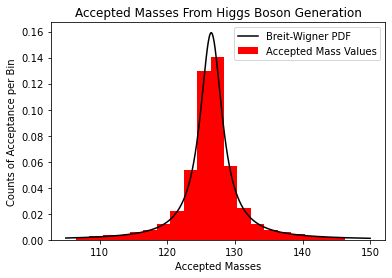

In [67]:
# plotting accepted masses as a histogram
plt.hist(sample, bins = 20, color = 'red', density = True)
# plotting continuous PDF of breit Wigner distribution for comparison
xi = np.linspace(105,150,1000)
func = pdf(xi,m,Gamma)
plt.plot(xi,func,color = 'black')
# Adding all labels, details, and legend onto the plot
plt.ylabel('Counts of Acceptance per Bin')
plt.xlabel('Accepted Masses')
plt.title('Accepted Masses From Higgs Boson Generation')
plt.legend(['Breit-Wigner PDF','Accepted Mass Values'])

As we can see above, the accepted values which were randomly generated closely follow the actual plot of the Breit-Wigner PDF, which should be expected as we utilized rejection method with the PDF in use, to ensure the majority of the masses we collected would fall in this distribution. It is clear that there is a very frequent mean at around 126, and anything above or below that value sees generated mass frequency fall off very quickly.

__Task b:__
Plot the energy distribution and two angular(θ,ϕ) distribtuions of photon 1.

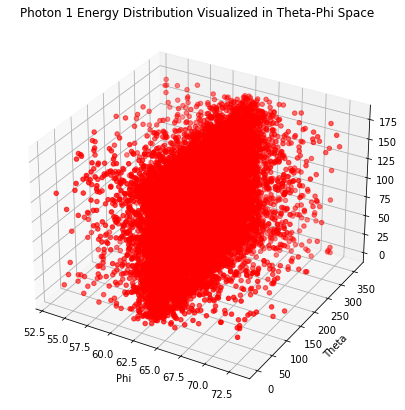

In [82]:
# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
# Creating plot
ax.scatter3D(p1_four, theta_list, phi_list, color = "red")
plt.title("Photon 1 Energy Distribution Visualized in Theta-Phi Space")
plt.ylabel('Theta')
plt.xlabel('Phi')
# show plot
plt.show()

While I am not entirely sure on the interpretation of part b, if we were to plot the energy distribution of photon 1 in Theta-phi space, this is what we would see with a larger density around phi= 62.5 and and most theta values between 50 and 350 having high density.

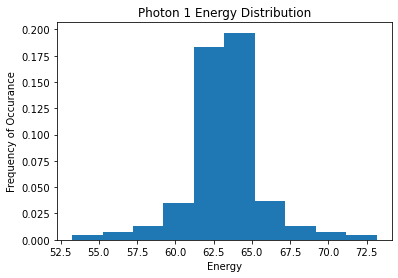

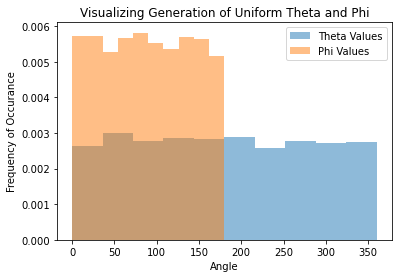

In [83]:
# plotting the histogram of energy distribution
plt.hist(p1_four, density = True)
plt.title("Photon 1 Energy Distribution")
plt.ylabel('Frequency of Occurance')
plt.xlabel('Energy')
plt.show()
# plotting angular distributions
plt.hist(theta_list, density = True, alpha = .5)
plt.hist(phi_list, density = True, alpha = .5)
plt.title("Visualizing Generation of Uniform Theta and Phi")
plt.ylabel('Frequency of Occurance')
plt.xlabel('Angle')
plt.legend(['Theta Values','Phi Values'])
plt.show()

If the question is meant to be interpreted like this, we can see that the histogram distribution of Photon 1 energy distribution is following the same distribution shape as the Breit-Wigner PDF, which makes sense, as it is just scaled down by a constant. The plots of Theta and Phi show that the randomly generated angles were truly uniform and random with no large discrepancies, thus validating the calculations we have done above. 